In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpltex
#plt.style.use('plot_style.txt')
import seaborn as sns
%matplotlib inline
from gw_lens_dir.overlap_lensing_sie_twoimages import overlap_sie
from gw_lens_dir.overlap_fourimages_lenstemp_check import overlap_sie_check
from gw_lens_dir.L_unlensed import Lunlensed
pd.set_option('display.float_format', lambda x: '%.3e' % x)

#from pycbc.filter import match


/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter, NullFormatter
from matplotlib.ticker import MaxNLocator
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.handlelength'] = 3.0
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 1.0
mpl.rcParams['xtick.major.size'] = 5.0
mpl.rcParams['xtick.minor.size'] = 3.0
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 1.0
mpl.rcParams['ytick.major.size'] = 5.0
mpl.rcParams['ytick.minor.size'] = 3.0
mpl.rcParams['ytick.right'] = True

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{sfmath}'

In [3]:
datadirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/data/"
plotdirName = "/Users/saifali/Desktop/gwlensing/plots/"

In [4]:
ein_rad_4 = 1.767909e-04
ein_rad_45 = 2.237510e-04
ein_rad_5 = 2.762358e-04
ein_rad_6 = 3.977795e-04

In [5]:
def df_edit(dirname = datadirName,
           datname = None):
       
    df = pd.read_csv(dirname + datname)
    df['source_x'] = df['source_x'] / ein_rad_6
    
    
    # for theta = 0 and 45
    sigma_arr = np.linspace(2, 60, 500)
    df = df[['source_x', 'td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43']]
    
    sigma_min = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    sigma_max = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    
    td_21_arr = np.zeros_like(sigma_arr)
    td_31_arr = np.zeros_like(sigma_arr)
    td_41_arr = np.zeros_like(sigma_arr)
    td_32_arr = np.zeros_like(sigma_arr)
    td_42_arr = np.zeros_like(sigma_arr)
    td_43_arr = np.zeros_like(sigma_arr)
    
    for i in range(df.shape[0]):
        for j in range(len(sigma_arr)):
            td_21_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_21']
            td_31_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_31']
            td_41_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_41']
            td_32_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_32']
            td_42_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_42']
            td_43_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_43']
        
        sigma_min[i][0] = sigma_arr[td_21_arr < 0.05][-1]
        sigma_min[i][1] = sigma_arr[td_31_arr < 0.05][-1]
        sigma_min[i][2] = sigma_arr[td_41_arr < 0.05][-1]
        sigma_min[i][3] = sigma_arr[td_32_arr < 0.05][-1]
        sigma_min[i][4] = sigma_arr[td_42_arr < 0.05][-1]
        sigma_min[i][5] = sigma_arr[td_43_arr < 0.05][-1]  # comment this for theta = 0
        
        sigma_max[i][0] = sigma_arr[td_21_arr > 1.40][0]
        sigma_max[i][1] = sigma_arr[td_31_arr > 1.40][0]
        sigma_max[i][2] = sigma_arr[td_41_arr > 1.40][0]
        sigma_max[i][3] = sigma_arr[td_32_arr > 1.40][0]
        sigma_max[i][4] = sigma_arr[td_42_arr > 1.40][0]
        sigma_max[i][5] = sigma_arr[td_43_arr > 1.40][0] # comment this for theta = 0


    '''
          # theta = 90 deg
    sigma_arr = np.linspace(2, 120, 500)
    df = df[['source_x', 'td_31', 'td_41', 'td_43']]
    sigma_min = [[0, 0, 0] for i in range(df.shape[0])]
    sigma_max = [[0, 0, 0] for i in range(df.shape[0])]
    
    td_31_arr = np.zeros_like(sigma_arr)
    td_41_arr = np.zeros_like(sigma_arr)
    td_43_arr = np.zeros_like(sigma_arr)
    
    for i in range(df.shape[0]):
        for j in range(len(sigma_arr)):
            td_31_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_31']
            td_41_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_41']
            td_43_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_43']
        
        sigma_min[i][0] = sigma_arr[td_31_arr < 0.05][-1]
        sigma_min[i][1] = sigma_arr[td_41_arr < 0.05][-1]
        sigma_min[i][2] = sigma_arr[td_43_arr < 0.05][-1]
        
        
        sigma_max[i][0] = sigma_arr[td_31_arr > 1.40][0]
        sigma_max[i][1] = sigma_arr[td_41_arr > 1.40][0]
        sigma_max[i][2] = sigma_arr[td_43_arr > 1.40][0] 
    
  
    '''


    return np.array(df['source_x']), np.array(sigma_min), np.array(sigma_max)

#df_edit(datname = "flux_fourimages_theta_45_sigma=6_sorted.csv")
y, sigma_min, sigma_max = df_edit(datname = "flux_fourimages_theta_45_sigma=6_sorted.csv")

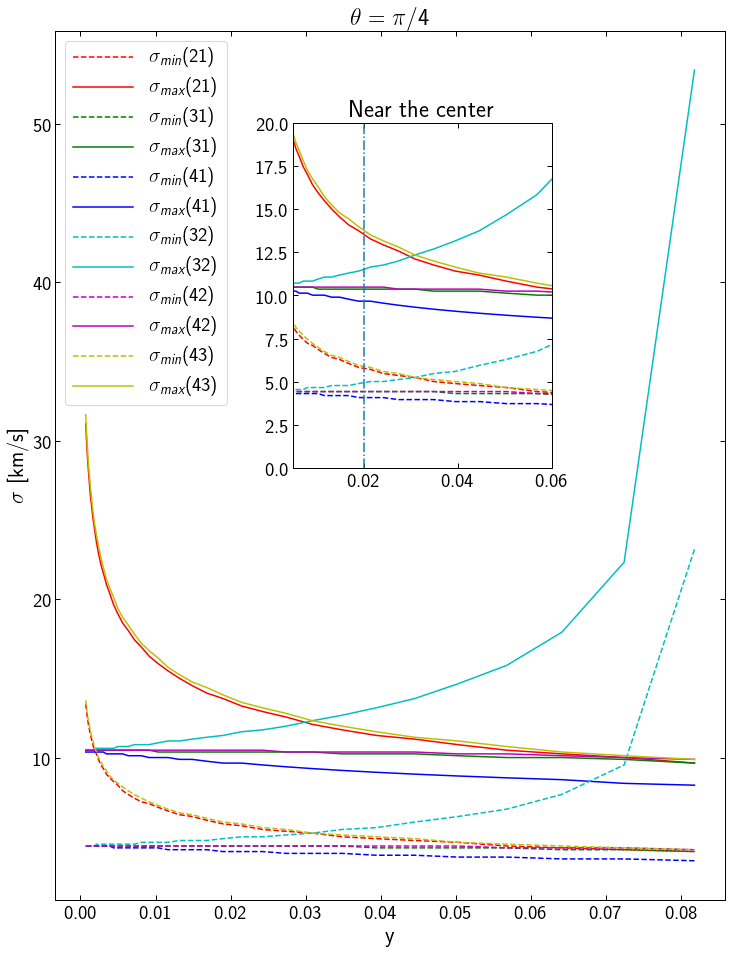

In [6]:
fig, ax1 = plt.subplots()
fig.set_size_inches([12,16])

color = ['r', 'g', 'b', 'c', 'm', 'y']
label = ['21', '31', '41', '32', '42', '43']

for i in range(len(label)):
    ax1.plot(y, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(y, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel('y', fontsize = 22)
ax1.set_ylabel(r'$\sigma$ [km/s]', fontsize = 22)
ax1.legend(loc = 2)

left, bottom, width, height = [0.4, 0.5, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
for i in range(len(label)):
    ax2.plot(y, sigma_min[:, i], '--', color = color[i])
    ax2.plot(y, sigma_max[:, i], color = color[i])

#theta = 0
# ax2.set_xlim(0.02, 0.1)
# ax2.set_ylim(-1, 15)
# ax2.axvline(0.05, ls = '-.')


# theta = 45 
ax2.set_xlim(0.005, 0.06)
ax2.set_ylim(0, 20)
ax2.axvline(0.02, ls = '-.')



ax2.set_title('Near the center')
ax1.set_title(r"$\theta = \pi/4$")
fig.savefig(plotdirName + 'sigma_range_theta_45.pdf')

Text(0.5,1,'$\\theta = \\pi/2$')

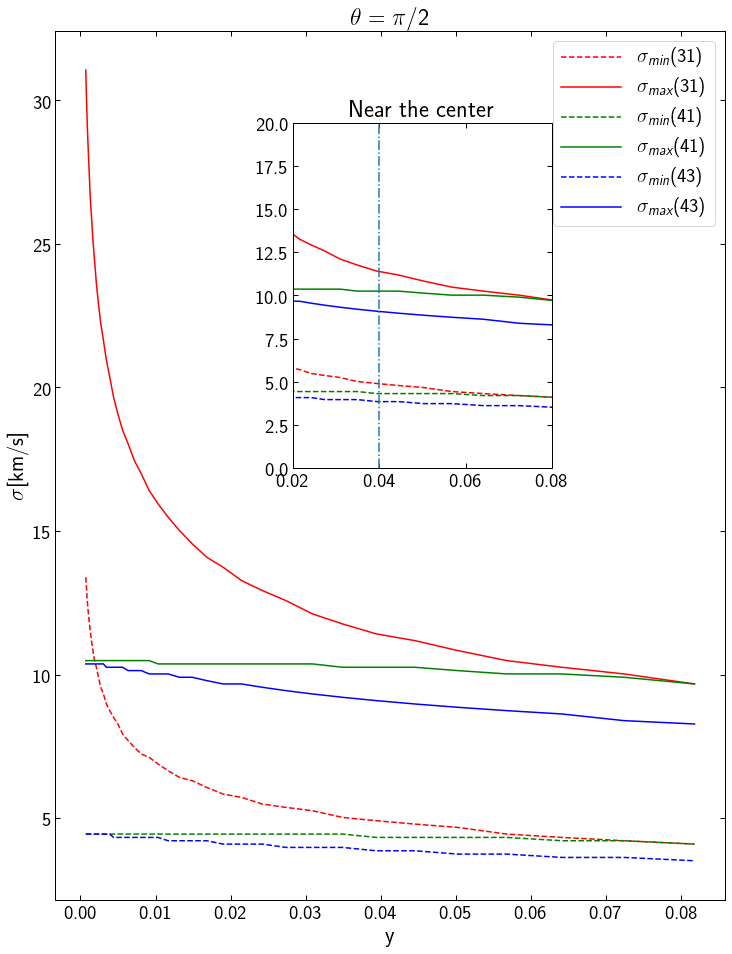

In [7]:
# for theta = 90 deg
fig, ax1 = plt.subplots()
fig.set_size_inches([12,16])

color = ['r', 'g', 'b']
label = ['31', '41', '43']

for i in range(len(label)):
    ax1.plot(y, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(y, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel('y', fontsize = 22)
ax1.set_ylabel(r'$\sigma$[km/s]', fontsize = 22)
ax1.legend()

left, bottom, width, height = [0.4, 0.5, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
for i in range(len(label)):
    ax2.plot(y, sigma_min[:, i], '--', color = color[i])
    ax2.plot(y, sigma_max[:, i], color = color[i])

# theta = 90
ax2.set_xlim(0.02, 0.08)
ax2.set_ylim(0, 20)
ax2.axvline(0.04, ls = '-.')

ax2.set_title('Near the center')
ax1.set_title(r"$\theta = \pi/2$")
#fig.savefig(plotdirName + 'sigma_range_theta_90.pdf')

In [53]:
df_fourimages_theta = pd.read_csv(datadirName + "flux_fourimages_y_0.04_sigma=6_sorted.csv")
#df_fourimages_theta

In [55]:
def df_edit_theta(dirname = datadirName,
           datname = None):
       
    df = pd.read_csv(dirname + datname)
    # change to ellip or theta
    sigma_arr = np.linspace(2, 60, 500)
    df = df[['theta', 'td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43']]
    
    sigma_min = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    sigma_max = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    
    td_21_arr = np.zeros_like(sigma_arr)
    td_31_arr = np.zeros_like(sigma_arr)
    td_41_arr = np.zeros_like(sigma_arr)
    td_32_arr = np.zeros_like(sigma_arr)
    td_42_arr = np.zeros_like(sigma_arr)
    td_43_arr = np.zeros_like(sigma_arr)
    
    for i in range(df.shape[0]):
        for j in range(len(sigma_arr)):
            td_21_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_21']
            td_31_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_31']
            td_41_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_41']
            td_32_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_32']
            td_42_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_42']
            td_43_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_43']
        
        sigma_min[i][0] = sigma_arr[td_21_arr < 0.05][-1]
        sigma_min[i][1] = sigma_arr[td_31_arr < 0.05][-1]
        sigma_min[i][2] = sigma_arr[td_41_arr < 0.05][-1]
        sigma_min[i][3] = sigma_arr[td_32_arr < 0.05][-1]
        sigma_min[i][4] = sigma_arr[td_42_arr < 0.05][-1]
        sigma_min[i][5] = sigma_arr[td_43_arr < 0.05][-1] 
        
        sigma_max[i][0] = sigma_arr[td_21_arr > 1.40][0]
        sigma_max[i][1] = sigma_arr[td_31_arr > 1.40][0]
        sigma_max[i][2] = sigma_arr[td_41_arr > 1.40][0]
        sigma_max[i][3] = sigma_arr[td_32_arr > 1.40][0]
        sigma_max[i][4] = sigma_arr[td_42_arr > 1.40][0]
        sigma_max[i][5] = sigma_arr[td_43_arr > 1.56][0]
        
    # change tp ellip or theta    
    return np.array(df['theta']), np.array(sigma_min), np.array(sigma_max)

#df_edit_theta(datname = "flux_fourimages_y_0.08_sigma=6_sorted.csv")
#ellip, sigma_min, sigma_max = df_edit_theta(datname = "flux_fourimages_y_0.02_theta_45_sigma=6_sorted.csv")

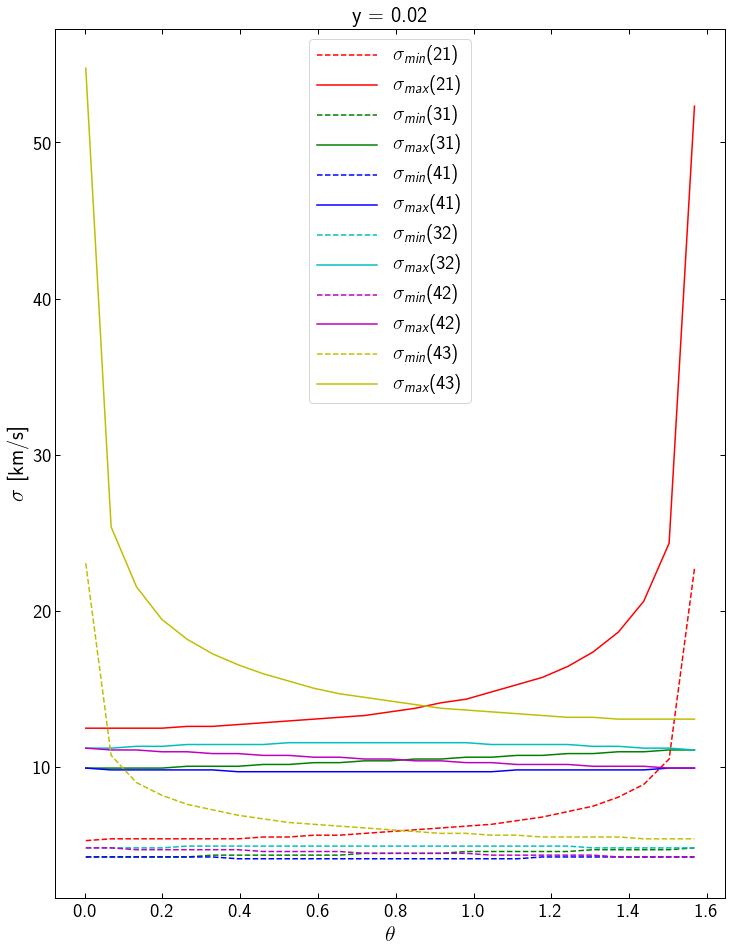

In [71]:
theta, sigma_min, sigma_max = df_edit_theta(datname =  "flux_fourimages_y_0.02_sigma=6_sorted.csv")

fig, axs = plt.subplots(1, sharex = True, sharey = True)
plt.subplots_adjust(wspace=0.01, hspace=0)
fig.set_size_inches([12,16])

color = ['r', 'g', 'b', 'c', 'm', 'y']
label = ['21', '31', '41', '32', '42', '43']

for i in range(len(label)):
    axs.plot(theta, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    axs.plot(theta, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
axs.set_xlabel(r'$\theta$', fontsize = 22)
axs.set_ylabel(r'$\sigma$ [km/s]', fontsize = 22)
axs.legend()

# for i in range(len(label)-3, len(label)):
#     ax2.plot(theta, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
#     ax2.plot(theta, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
# ax2.set_xlabel(r'$\theta$', fontsize = 22)
# ax2.set_ylabel(r'$\sigma$')
# ax2.legend()

axs.set_title('y = 0.02',fontsize=22)
#fig.savefig(plotdirName + 'sigma_range_y_0.02.pdf')

In [42]:
df_ellip_theta_45 = pd.read_csv(datadirName + "flux_fourimages_y_0.02_theta_45_sigma=6_sorted.csv")

In [20]:
df_ellip_theta_0 = pd.read_csv(datadirName + "flux_fourimages_y_0.02_theta_0_sigma=6_sorted.csv")

Text(0, 0.5, '$\\Delta td$')

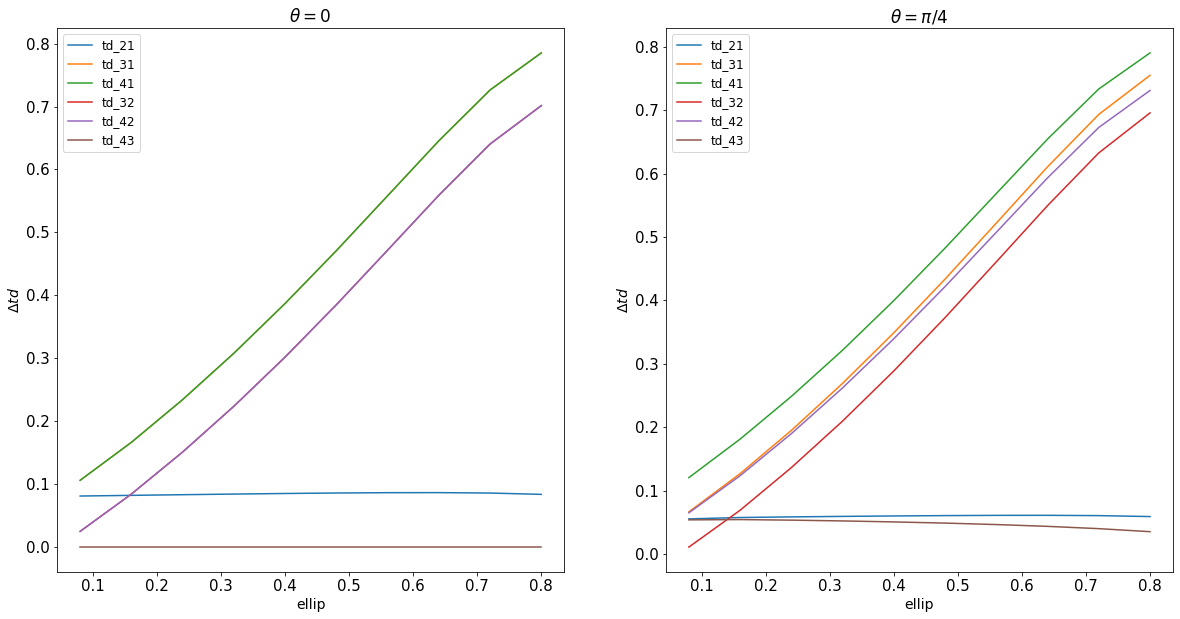

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_ellip_theta_0.plot(x = 'ellip', y = ['td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43'], figsize=(20,10), ax = axes[0])
axes[0].set_title(r'$\theta = 0$')
axes[0].set_ylabel(r'$\Delta td$')
df_ellip_theta_45.plot(x = 'ellip', y = ['td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43'], figsize=(20,10), ax = axes[1]) 
axes[1].set_title(r'$\theta = \pi/4$')
axes[1].set_ylabel(r'$\Delta td$')

In [22]:
ellip, sigma_min, sigma_max = df_edit_theta(datname = "flux_fourimages_y_0.02_theta_45_sigma=6_sorted.csv")

Text(0.5, 1.0, 'y = 0.02, $\\theta = \\pi/4$')

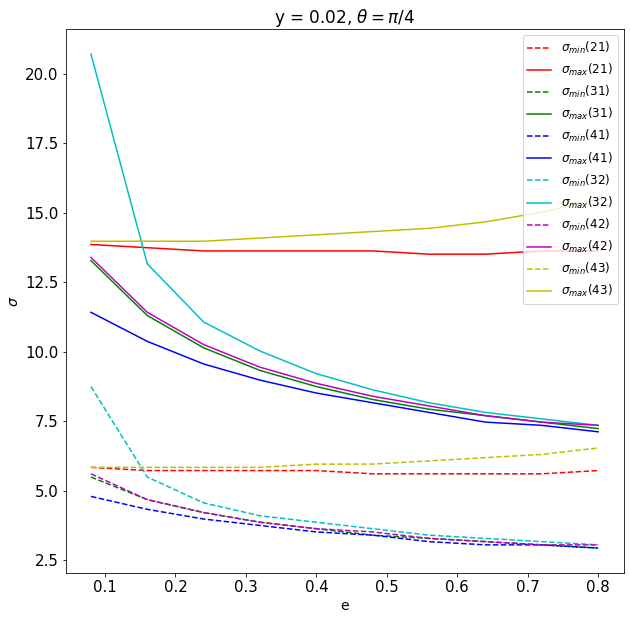

In [23]:
fig, ax1 = plt.subplots()
fig.set_size_inches([10, 10])

color = ['r', 'g', 'b', 'c', 'm', 'y']
label = ['21', '31', '41', '32', '42', '43']

for i in range(len(label)):
    ax1.plot(ellip, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(ellip, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel(r'e')
ax1.set_ylabel(r'$\sigma$')
ax1.legend()
ax1.set_title(r'y = 0.02, $\theta = \pi/4$')